In [6]:
import pandas as pd
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression


# Load the data from CSV
data = pd.read_csv('TotalData1.csv')
label_encoder = LabelEncoder()
data['City_Encoded'] = label_encoder.fit_transform(data['city'])
data['Type_Encoded'] = label_encoder.fit_transform(data['rest type'])
data['Open_Encoded'] = label_encoder.fit_transform(data['rest open'])
data['Address_Encoded'] = label_encoder.fit_transform(data['rest addres'])
linear_features = data[['City_Encoded','Type_Encoded','Open_Encoded','Address_Encoded','reviews num','None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',
          'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	
          'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	
          'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	
          'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',
          'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',
    	  'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',
          'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,
          'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	
          'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',
          'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',
          'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,
          'Irish pub'	,'Crazy Sunday']]
logistic_features = data[['City_Encoded','Type_Encoded','Open_Encoded','Address_Encoded','reviews num','None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',
          'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	
          'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	
          'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	
          'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',
          'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',
    	  'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',
          'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,
          'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	
          'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',
          'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',
          'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,
          'Irish pub'	,'Crazy Sunday']]
rating_target = data['rest rank']
best_restaurant_target = data['rest name']



# Split the data into training and testing sets
linear_X_train, linear_X_test, linear_y_train, linear_y_test = train_test_split(linear_features, rating_target, test_size=0.7, random_state=42)
logistic_X_train, logistic_X_test, logistic_y_train, logistic_y_test = train_test_split(logistic_features, best_restaurant_target, test_size=0.7, random_state=42)


# Preprocessing for categorical features

categorical_features = ['city','rest addres','rest open','rest type']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numeric features
numeric_features = [ 'reviews num','None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',
          'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	
          'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	
          'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	
          'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',
          'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',
    	  'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',
          'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,
          'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	
          'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',
          'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',
          'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,
          'Irish pub'	,'Crazy Sunday']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])


# Initialize and train the linear regression model for ratings prediction
linear_model = LinearRegression()
linear_model.fit(linear_X_train, linear_y_train)

# Make predictions on the test set for ratings
linear_y_pred = linear_model.predict(linear_X_test)

# Evaluate the linear regression model for ratings
linear_mse = mean_squared_error(linear_y_test, linear_y_pred)
linear_r2 = r2_score(linear_y_test, linear_y_pred)

# Print the evaluation metrics for linear regression
print('Linear Regression:')
print('Mean Squared Error:', linear_mse)
print('R2 Score:', -linear_r2)


# Gradient Boosting
model_gb = GradientBoostingRegressor()

# Create the pipeline
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_gb)
])

# Fit the pipeline
pipeline_gb.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print('\nGradient Boosting Regression:')
print(f"Gradient Boosting Regression - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regression - R2 Score: {r2_gb}")



Linear Regression:
Mean Squared Error: 4.6618637057773515
R2 Score: 0.0879055911787674

Gradient Boosting Regression:
Gradient Boosting Regression - Mean Squared Error: 0.44970683725473387
Gradient Boosting Regression - R2 Score: 0.8992176655398675


In [7]:
# Predict rank for a new restaurant
new_restaurant = pd.DataFrame({
    'reviews num': [1],
    'city': ['חולון'],
    'rest open': ['No Info'],
    'rest type': ['A steakhouse'],
    'rest addres': ['נטור 27'],
    'None': [0],
    'Bar restaurant': [1],
    'Animal friendly': [1],
    'Wi-fi': [1],
    'Possibility of sitting outside': [1],
    'Restaurant with free parking': [1],
	'A restaurant with regulated parking': [1],
    'Shipments': [1],
	'Take Away': [1],
    'Catering services': [0],
    'Chef to the house': [0],
    'Outdoor garden': [1],
    'dog friendly': [1],
    'Country restaurant': [0],	
    'Kosher restaurant': [1],
    'Accessibility for the disabled': [1],
	'Events up to 50 people': [1],
    'Family day': [0],
	'Restaurant for events and conferences': [0],	
    'Team building days': [0],
     'fun days': [0],
    'meetings': [0],
    'Open on Friday': [0],
    'Sylvester': [0],
	'Table reservation service': [0],
    'Small events': [0],
    'Food ready to sit/take away': [0],
    'Boutique events': [0],
    'A strictly kosher restaurant': [0],
	'Bar/Bat Mitzvah': [0],
    'alliance': [0],
	'Open on Sundays': [0],
	'Events up to 30 people': [0],
    'Chef restaurant': [0],
    'Sukkot, Tabernacles': [0],
    'weddings'	: [0],
    'birthdays'	: [0],
    'wedding anniversaries': [0],
    'Seminars': [0],
    'conventions': [0],
    'Company parties': [0],
    'Department Arabs': [0],
    'cocktail': [0],	
     'A place for events': [0],
    'private room': [0],
    'Events up to 150 people': [0],
    'Tapas bar': [0],
    'Shabbat observant business': [0],
    'Restaurant with meat shop': [0],
    'Projector and screen': [0],
    'live shows': [0],
    'Access to public transportation': [0],
	'Tutorials/workshops': [0],
    'conference rooms': [0],
    'Location for photography': [0],
    'amplification equipment': [0],
    'Events up to 300 people': [0],
    'press conferences'	: [0],
    'Bachelor/bachelorette parties': [0]	,
    'Exhibitions': [0],
    'Fashion shows': [0],
    'Smoking area': [0],	
    'Events up to 200 people': [0],
    'Night Life': [0],
    'Events up to 100 people': [0],
    'Open on Passover': [0],
    'Arrangements for businesses, institutions and factories': [0],
    'with a sukkah': [0],
    'A restaurant with a wine cellar': [0],
    'Open on Saturday': [0],
    'Restaurants on the sea': [0],
    'sports bar': [0],
    'A restaurant with discounts for students'	: [0],
    'A restaurant in nature': [0],	
    'burger club': [0],
    'fast food': [0],
    'Neighborhood bar/pub': [0]	,
    'Irish pub'	: [0],
    'Crazy Sunday': [0]
})


new_predictions = pipeline_gb.predict(new_restaurant)
print(new_predictions)

[4.02439321]


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load the data
data = pd.read_csv('TotalData1.csv')

# Separate features and target variable
X = data[['city','rest addres',	'rest open','rest type','reviews num', 'Food rank', 'Service rank', 'atmosphere rank', 'price rank',
          'None',	'Bar restaurant',	'Animal friendly',	'Possibility of sitting outside',	'Restaurant with free parking',	'A restaurant with regulated parking',
          'Shipments',	'Take Away',	'Catering services',	'Chef to the house',	'Outdoor garden',	'dog friendly',	'Wi-fi',	'Country restaurant',	
          'Kosher restaurant',	'Accessibility for the disabled',	'Events up to 50 people',	'Family day',	'Restaurant for events and conferences',	
          'Team building days','fun days',	'meetings',	'Open on Friday',	'Sylvester',	'Table reservation service',	'Small events',	'Food ready to sit/take away',	
          'Boutique events',	'A strictly kosher restaurant',	'Bar/Bat Mitzvah',	'alliance',	'Open on Sundays',	'Events up to 30 people',	'Chef restaurant',	'Sukkot, Tabernacles',
          'weddings'	,'birthdays'	,'wedding anniversaries',	'Seminars',	'conventions',	'Company parties',	'Department Arabs',	'cocktail',	'A place for events',
    	  'private room',	'Events up to 150 people',	'Tapas bar',	'Shabbat observant business','Restaurant with meat shop',	'Projector and screen',	'live shows',
          'Access to public transportation',	'Tutorials/workshops',	'conference rooms',	'Location for photography',	'amplification equipment'	,
          'Events up to 300 people',	'press conferences'	,'Bachelor/bachelorette parties'	,'Exhibitions',	'Fashion shows',	'Smoking area',	
          'Events up to 200 people',	'Night Life'	,'Events up to 100 people',	'Open on Passover',	'Arrangements for businesses, institutions and factories',
          'with a sukkah',	'A restaurant with a wine cellar',	'Open on Saturday',	'Restaurants on the sea',	'sports bar',
          'A restaurant with discounts for students'	,'A restaurant in nature',	'burger club',	'fast food',	'Neighborhood bar/pub'	,
          'Irish pub'	,'Crazy Sunday']]

y = data['rest rank']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for categorical features
categorical_features = ['rest type','city']#, 'rest addres']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessing for numeric features
numeric_features = ['reviews num', 'Food rank', 'Service rank', 'atmosphere rank', 'price rank']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine the preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numeric_transformer, numeric_features)
])

# Random Forest
model_rf = RandomForestRegressor()

# Create the pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_rf)
])

# Fit the pipeline
pipeline_rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = pipeline_rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R2 Score: {r2_rf}")

# Gradient Boosting
model_gb = GradientBoostingRegressor()

# Create the pipeline
pipeline_gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_gb)
])

# Fit the pipeline
pipeline_gb.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = pipeline_gb.predict(X_test)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting Regression - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regression - R2 Score: {r2_gb}")

# Support Vector Regression
model_svr = SVR()

# Create the pipeline
pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model_svr)
])

# Fit the pipeline
pipeline_svr.fit(X_train, y_train)

# Predict on the test data
y_pred_svr = pipeline_svr.predict(X_test)

# Calculate evaluation metrics
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f"Support Vector Regression - Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression - R2 Score: {r2_svr}")





Random Forest Regression - Mean Squared Error: 0.014886107382550333
Random Forest Regression - R2 Score: 0.9966639229632441
Gradient Boosting Regression - Mean Squared Error: 0.015534707262930467
Gradient Boosting Regression - R2 Score: 0.9965185673567465
Support Vector Regression - Mean Squared Error: 0.025947290822818853
Support Vector Regression - R2 Score: 0.9941850371722092


                    rest name                     rest add rest open  \
0         הסביח של סומך, חדרה         הרברט סמואל 76, חדרה   No Info   
1  אושי אושי באר שבע, באר שבע      שד' יצחק רגר 2, באר שבע   No Info   
2        פיצה דומינו, תל אביב           פרישמן 16, תל אביב   No Info   
3        נפגש אצל אילן, טבריה  הירדן 12, טבריה, סובב כינרת   No Info   
4          אקסטרה פיצה, טבריה  אלחדיף 5, טבריה, סובב כינרת   No Info   

     rest type  rest rank  reviews num  Food rank  Service rank  \
0       Hummus      5.000            1      5.000         5.000   
1        Sushi      5.000            1      5.000         5.000   
2   A pizzeria      5.000            1      5.000         4.500   
3  Street food      5.000            3      5.000         5.000   
4   A pizzeria      5.000            2      5.000         5.000   

   atmosphere rank  price rank  None  Bar restaurant  Animal friendly  \
0            5.000       5.000     1               0                0   
1            5.000

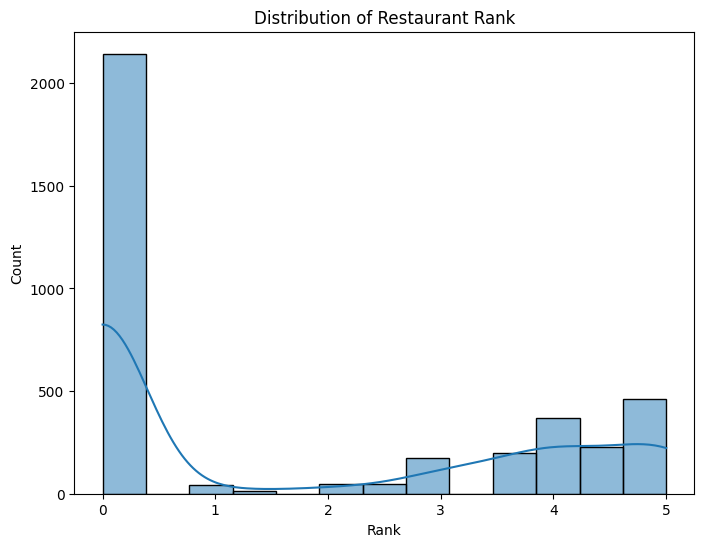

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('TotalData1.csv')

# Explore the dataset
print(data.head())  # View the first few rows
print(data.info())  # Check the data types and missing values
print(data.describe())  # Get statistical summary of numerical columns

# Visualize the target variable distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['rest rank'], kde=True)
plt.title('Distribution of Restaurant Rank')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.show()


